In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
b, u, a30 = sp.symbols('b u a30')

I3_mod = 2*a30 * (3 * (1 - a30**2) * a30 + 2 * sp.cos(u) * (1 - a30**2)**(3/2) + b*a30)
I3_mod0 = I3_mod.subs({a30: 0.3, u: 0}) 

print(I3_mod0)

0.18*b + 1.5331016079473


In [18]:
y, p3 = sp.symbols('y p3')
b_values = np.arange(-1, 1.1, 0.1)
#print(b_values)
y = 1

F = -13*p3**4 + p3**3 * (30 + 6*b) - p3**2 * (21 + 6*b + b**2 - I3_mod0*3/y) 
+ p3*(4 + I3_mod0*b/y + I3_mod0*3/y) - I3_mod0**2/(4*y**2)

p3*(b*(0.18*b + 1.5331016079473) + 0.54*b + 8.59930482384191) - 0.587600135072653*(0.117409047819736*b + 1)**2

In [24]:
sol_1 = []
for b_val in b_values:
    solution1 = sp.solve(F.subs(b, b_val), p3)
    #print(solution1)
    real_solutions1 = [sol.evalf() for sol in solution1 if sol.is_real]
    for elem in real_solutions1:
        sol_1.append((b_val, elem))
for elem in sol_1:
    print(elem)

(np.float64(-1.0), 0)
(np.float64(-0.9), 0)
(np.float64(-0.8), 0)
(np.float64(-0.7000000000000001), 0)
(np.float64(-0.6000000000000001), 0)
(np.float64(-0.5000000000000001), 0)
(np.float64(-0.5000000000000001), 0.951400289874179)
(np.float64(-0.5000000000000001), 1.12552278704890)
(np.float64(-0.40000000000000013), 0)
(np.float64(-0.40000000000000013), 0.916748004704438)
(np.float64(-0.40000000000000013), 1.20632891837249)
(np.float64(-0.30000000000000016), 0)
(np.float64(-0.30000000000000016), 0.900562351514173)
(np.float64(-0.30000000000000016), 1.26866841771660)
(np.float64(-0.20000000000000018), 0)
(np.float64(-0.20000000000000018), 0.892486850474697)
(np.float64(-0.20000000000000018), 1.32289776490992)
(np.float64(-0.1000000000000002), 0)
(np.float64(-0.1000000000000002), 0.889361099469432)
(np.float64(-0.1000000000000002), 1.37217736206903)
(np.float64(-2.220446049250313e-16), 0)
(np.float64(-2.220446049250313e-16), 0.889707913301518)
(np.float64(-2.220446049250313e-16), 1.417984

In [28]:
# Список для хранения результатов
results = []

# Решаем уравнение для различных значений b
for elem in sol_1:
    b_val = elem[0]
    real_solutions_p3 = elem[1]
    if real_solutions_p3:
        a3_val = real_solutions_p3  # Берем первое реальное решение
        # Подставляем в функцию f
        f = F.subs({b: b_val, p3: real_solutions_p3}) 
        results.append((real_solutions_p3, f))
print(len(results))
print("results:")
print(*results, sep='\n')

32
results:
(0.951400289874179, 1.42108547152020e-14)
(1.12552278704890, 2.13162820728030e-14)
(0.916748004704438, 8.88178419700125e-15)
(1.20632891837249, 1.06581410364015e-14)
(0.900562351514173, 1.24344978758018e-14)
(1.26866841771660, 2.48689957516035e-14)
(0.892486850474697, 8.88178419700125e-15)
(1.32289776490992, 2.84217094304040e-14)
(0.889361099469432, 1.06581410364015e-14)
(1.37217736206903, 1.06581410364015e-14)
(0.889707913301518, 7.10542735760100e-15)
(1.41798439439079, 2.13162820728030e-14)
(0.892692956075011, 8.88178419700125e-15)
(1.46115319777114, 1.42108547152020e-14)
(0.897789576130255, 1.06581410364015e-14)
(1.50221042386974, 4.26325641456060e-14)
(0.904639886580396, 5.32907051820075e-15)
(1.54151395957345, 2.84217094304040e-14)
(0.912987552317292, 1.06581410364015e-14)
(1.57932013999040, 1.42108547152020e-14)
(0.922641618067876, 1.42108547152020e-14)
(1.61581992039366, 2.84217094304040e-14)
(0.933455456313851, 1.06581410364015e-14)
(1.65115992830153, 1.421085471520

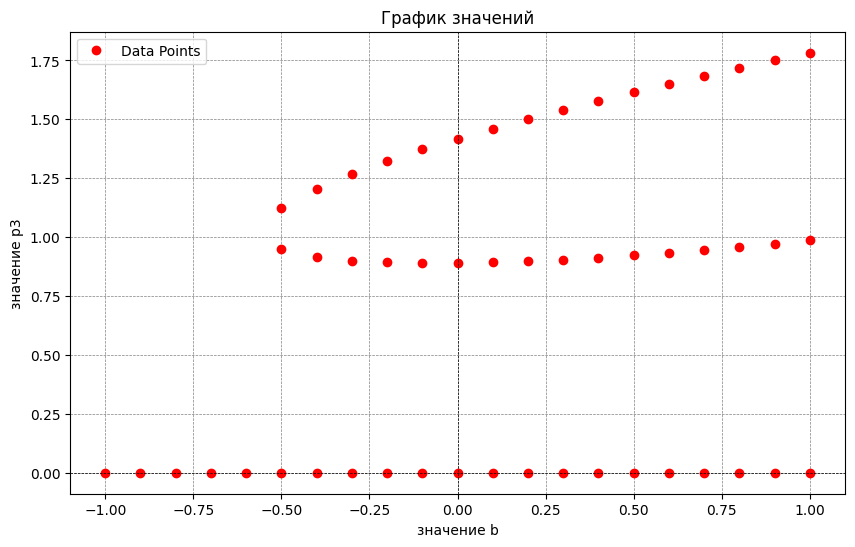

In [36]:
x, y = zip(*sol_1)  # Распаковываем кортежи в два списка

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='None', color='r', label='Data Points')

plt.title('График значений')
plt.xlabel('значение b')
plt.ylabel('значение p3')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

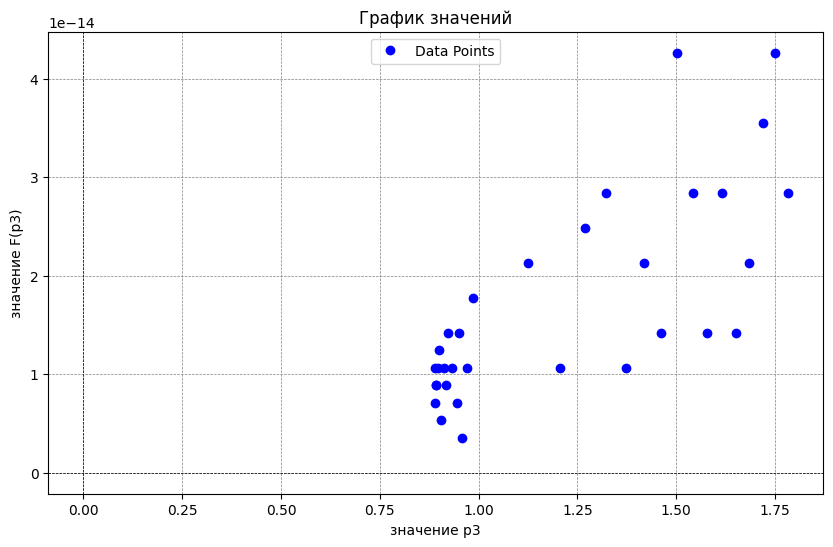

In [35]:
x, y = zip(*results)  # Распаковываем кортежи в два списка

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='None', color='b', label='Data Points')

plt.title('График значений')
plt.xlabel('значение p3')
plt.ylabel('значение F(p3)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()